### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



El ingreso de la tienda 1 fue de 1,150,880,400.00
El ingreso de la tienda 2 fue de 1,116,343,500.00
El ingreso de la tienda 3 fue de 1,098,019,600.00
El ingreso de la tienda 4 fue de 1,038,375,700.00


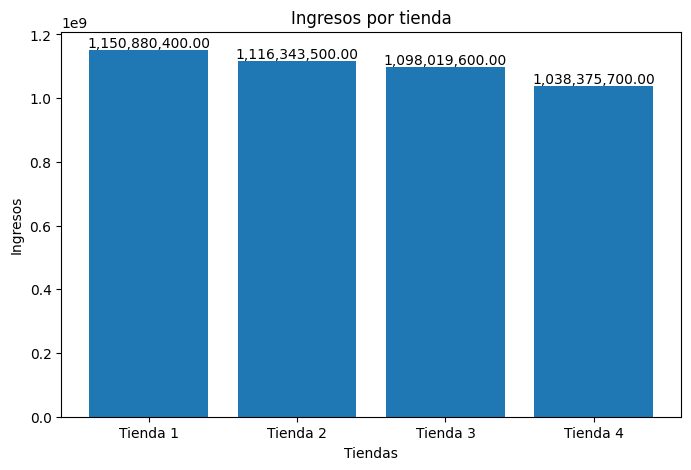

In [33]:
ingresos = []
for i, tienda_df in enumerate([tienda1, tienda2, tienda3, tienda4]):
    ingreso = tienda_df["Precio"].sum()
    ingresos.append(ingreso)
    print(f'El ingreso de la tienda {i+1} fue de {ingreso:,.2f}')

nombresTienda= ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.figure(figsize=(8, 5))
plt.bar(nombresTienda, ingresos)
plt.title('Ingresos por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos')
for i, valor in enumerate(ingresos):
    plt.text(i, valor, f'{valor:,.2f}', ha='center', va='bottom')
plt.show()



# 2. Ventas por categoría

Las ventas por categoría de la tienda 1 son: 
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Las ventas por categoría de la tienda 2 son: 
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Las ventas por categoría de la tienda 3 son: 
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Las ventas por categoría de la tienda 4 son: 
Cat

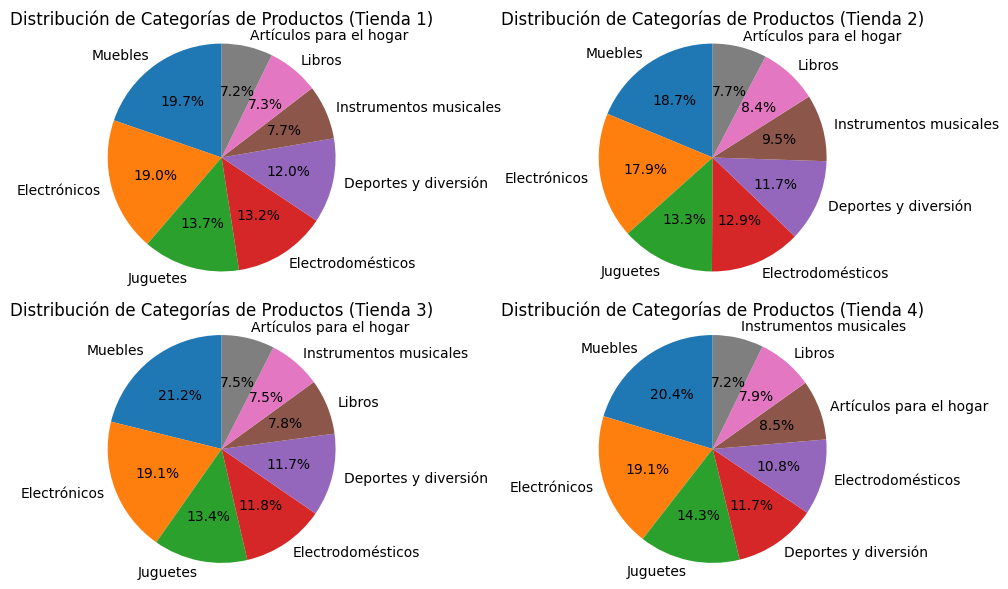

In [6]:
categorias_tienda1 = tienda1["Categoría del Producto"].value_counts()
categorias_tienda2 = tienda2["Categoría del Producto"].value_counts()
categorias_tienda3 = tienda3["Categoría del Producto"].value_counts()
categorias_tienda4 = tienda4["Categoría del Producto"].value_counts()

print(f'Las ventas por categoría de la tienda 1 son: \n{categorias_tienda1.to_string()}')
print(f'Las ventas por categoría de la tienda 2 son: \n{categorias_tienda2.to_string()}')
print(f'Las ventas por categoría de la tienda 3 son: \n{categorias_tienda3.to_string()}')
print(f'Las ventas por categoría de la tienda 4 son: \n{categorias_tienda4.to_string()}')

tiendas_bd = [tienda1, tienda2, tienda3, tienda4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

fig, axes = plt.subplots(2, 2, figsize=(10, 6))

for i, tienda_df in enumerate(tiendas_bd):
    categorias = tienda_df['Categoría del Producto'].value_counts().index
    cantidades = tienda_df['Categoría del Producto'].value_counts().values
    ax = axes[i // 2, i % 2]

    ax.pie(cantidades, labels=categorias, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Distribución de Categorías de Productos ({tiendas[i]})')
    ax.axis('equal')

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [18]:
calificacion_promedio_tienda1 = tienda1["Calificación"].mean()
calificacion_promedio_tienda2 = tienda2["Calificación"].mean()
calificacion_promedio_tienda3 = tienda3["Calificación"].mean()
calificacion_promedio_tienda4 = tienda4["Calificación"].mean()

print(f'La calificación promedio de la tienda 1 es: {calificacion_promedio_tienda1:.2f}')
print(f'La calificación promedio de la tienda 2 es: {calificacion_promedio_tienda2:.2f}')
print(f'La calificación promedio de la tienda 3 es: {calificacion_promedio_tienda3:.2f}')
print(f'La calificación promedio de la tienda 4 es: {calificacion_promedio_tienda4:.2f}')

La calificación promedio de la tienda 1 es: 3.98
La calificación promedio de la tienda 2 es: 4.04
La calificación promedio de la tienda 3 es: 4.05
La calificación promedio de la tienda 4 es: 4.00


# 4. Productos más y menos vendidos

In [12]:
productos_por_tienda = {
    'Tienda 1': productos_tienda1,
    'Tienda 2': productos_tienda2,
    'Tienda 3': productos_tienda3,
    'Tienda 4': productos_tienda4
}

for nombre_tienda, productos_vendidos in productos_por_tienda.items():
    prod_mas_vendido = productos_vendidos.idxmax()
    cantidad_mas_vendido = productos_vendidos.max()
    prod_menos_vendido = productos_vendidos.idxmin()
    cantidad_menos_vendido = productos_vendidos.min()

    print(f'--- {nombre_tienda} ---')
    print(f'Producto más vendido: {prod_mas_vendido} ({cantidad_mas_vendido} unidades)')
    print(f'Producto menos vendido: {prod_menos_vendido} ({cantidad_menos_vendido} unidades)')
    print(" ")

--- Tienda 1 ---
Producto más vendido: Armario (60 unidades)
Producto menos vendido: Auriculares con micrófono (33 unidades)
 
--- Tienda 2 ---
Producto más vendido: Iniciando en programación (65 unidades)
Producto menos vendido: Juego de mesa (32 unidades)
 
--- Tienda 3 ---
Producto más vendido: Kit de bancas (57 unidades)
Producto menos vendido: Bloques de construcción (35 unidades)
 
--- Tienda 4 ---
Producto más vendido: Cama box (62 unidades)
Producto menos vendido: Guitarra eléctrica (33 unidades)
 


# 5. Envío promedio por tienda

In [16]:
envio_promedio_tienda1 = tienda1['Costo de envío'].mean()
envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

print(f'El envío promedio de la tienda 1 es: {envio_promedio_tienda1}')
print(f'El envío promedio de la tienda 2 es: {envio_promedio_tienda2}')
print(f'El envío promedio de la tienda 3 es: {envio_promedio_tienda3}')
print(f'El envío promedio de la tienda 4 es: {envio_promedio_tienda4}')

El envío promedio de la tienda 1 es: 26018.60958033065
El envío promedio de la tienda 2 es: 25216.235693090293
El envío promedio de la tienda 3 es: 24805.680373039424
El envío promedio de la tienda 4 es: 23459.457167090754


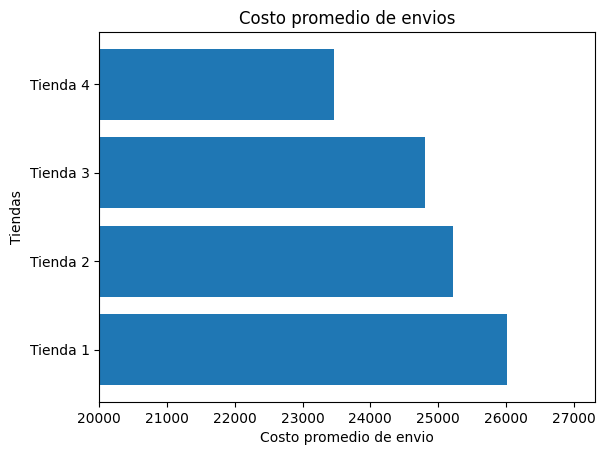

In [18]:
x_ingreso_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
y_ingreso_tiendas = [envio_promedio_tienda1, envio_promedio_tienda2, envio_promedio_tienda3, envio_promedio_tienda4]

plt.barh(x_ingreso_tiendas, y_ingreso_tiendas)
plt.xlim(left = 20000)
plt.title('Costo promedio de envios')
plt.ylabel('Tiendas')
plt.xlabel('Costo promedio de envio')
plt.show()

In [ ]:
#Conclusion, podemos identificar que la tienda menos eficiente es la Tienda 4, contando con un menos ingreso, una calificacion relativament mas baja que el promedio y ventas mas bajas
#Tambien tener en cuenta qu la Tienda 1 es una de las que mas dinero recauda pero una con el mayor costo de envio de todas las tienda, influyendo tambien en su calificacion general